SED690

SIT@KMUTT

Mar. 2025


Credit and source:

https://github.com/roboflow/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb

We use our own datasets (e.g., eggs) to train and validate to build our custom model (e.g., for detecting eggs). After finishing the training and modeling we will save the model and use it later for a detection of eggs.

Similarly, do the same things when we try to train the other datasets, e.g., toothbrushes for being used in classifications.


In [1]:
# Check the current working directory.

import os
HOME = os.getcwd()
print(HOME)

/content


In [2]:
# Install YOLOv8
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q
!pip install -U ultralytics  # with a latest update

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
# Make a directory for datasets

!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

/content/datasets


In [5]:
# We will upload our zipped dataset (labelled from Roboflow or LabelImg) to this directory.

from google.colab import files

# Upload the zipped folder
uploaded = files.upload()


Saving Egg-Fruit_Detection.v5i.yolov8.zip to Egg-Fruit_Detection.v5i.yolov8.zip


In [6]:
# Unzip the datasets (train, validaate, and test, etc.)

import zipfile

# Specify the name of the uploaded zip file
zip_file_name = '/content/datasets/Egg-Fruit_Detection.v5i.yolov8.zip'

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets/egg-fruit')

print("Folder extracted successfully.")

Folder extracted successfully.


In [7]:
from logging import currentframe
%cd {HOME}/datasets/egg-fruit

# check the current working directory

HOME = os.getcwd()
print(HOME)


/content/datasets/egg-fruit
/content/datasets/egg-fruit


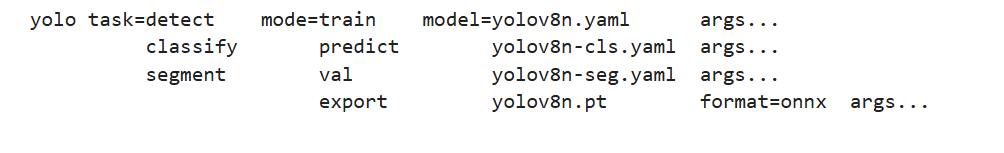

Train the model with our own dataset.

*** Change the task accordingly when you want to classify, segment or of course detect. ***

This command is useful when:

- You want to train a model from scratch or fine-tune a pretrained model on your custom dataset.
- You want to monitor the training process and validate the model periodically.
- You need to generate new model weights for deployment or further evaluation.

In [8]:
%cd {HOME}
HOME = os.getcwd()
print(HOME)


# This command is used to train available pre-trained YOLOv8 model on our dataset.
# It involves updating the model's weights based on the training data and validating
# the model periodically (after each epoch) during training.

# Adjust 'epoch' number as per your requirements.


!yolo task=detect mode=train model=yolov8s.pt data={HOME}/data.yaml epochs=120 imgsz=200 plots=True


# Afterwards, the 'best.pt' model is saved at ../runs/detect/train/weights/best.pt.
# Its weights is from the best performance of the model during training (of any epoch).

# Note that the 'last.pt' is the model with weights after the last epoch.

# We, however, will use the 'best.pt' model.


/content/datasets/egg-fruit
/content/datasets/egg-fruit
100% 21.5M/21.5M [00:00<00:00, 244MB/s]
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/egg-fruit/data.yaml, epochs=120, time=None, patience=100, batch=16, imgsz=200, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save

In [9]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/datasets/eggs_fruits_01.jpg' save=True

/content/datasets/egg-fruit
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/datasets/eggs_fruits_01.jpg: 160x224 2 apples, 2 eggs, 1 mango, 3 oranges, 41.3ms
Speed: 0.8ms preprocess, 41.3ms inference, 162.7ms postprocess per image at shape (1, 3, 160, 224)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content/datasets/egg-fruit


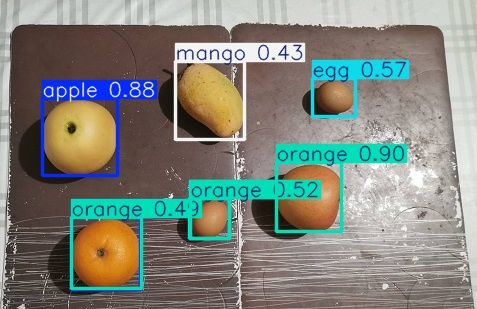

In [10]:
%cd {HOME}
Image(filename='/content/datasets/egg-fruit/runs/detect/predict/eggs_fruits_01.jpg', height=309)

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/datasets/eegs_fruit_02.png' save=True

/content/datasets/egg-fruit
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/datasets/eegs_fruit_02.png: 224x128 5 apples, 1 egg, 1 mango, 41.3ms
Speed: 1.0ms preprocess, 41.3ms inference, 181.8ms postprocess per image at shape (1, 3, 224, 128)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content/datasets/egg-fruit


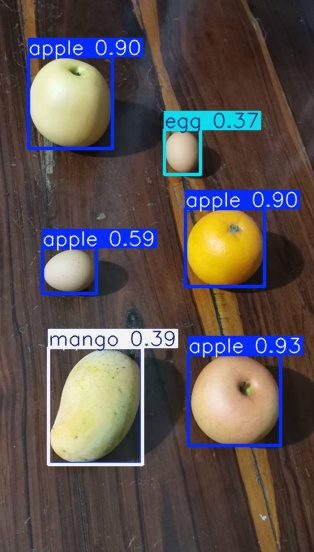

In [12]:
%cd {HOME}
Image(filename='/content/datasets/egg-fruit/runs/detect/predict2/eegs_fruit_02.jpg', height=552)

/content/datasets/egg-fruit


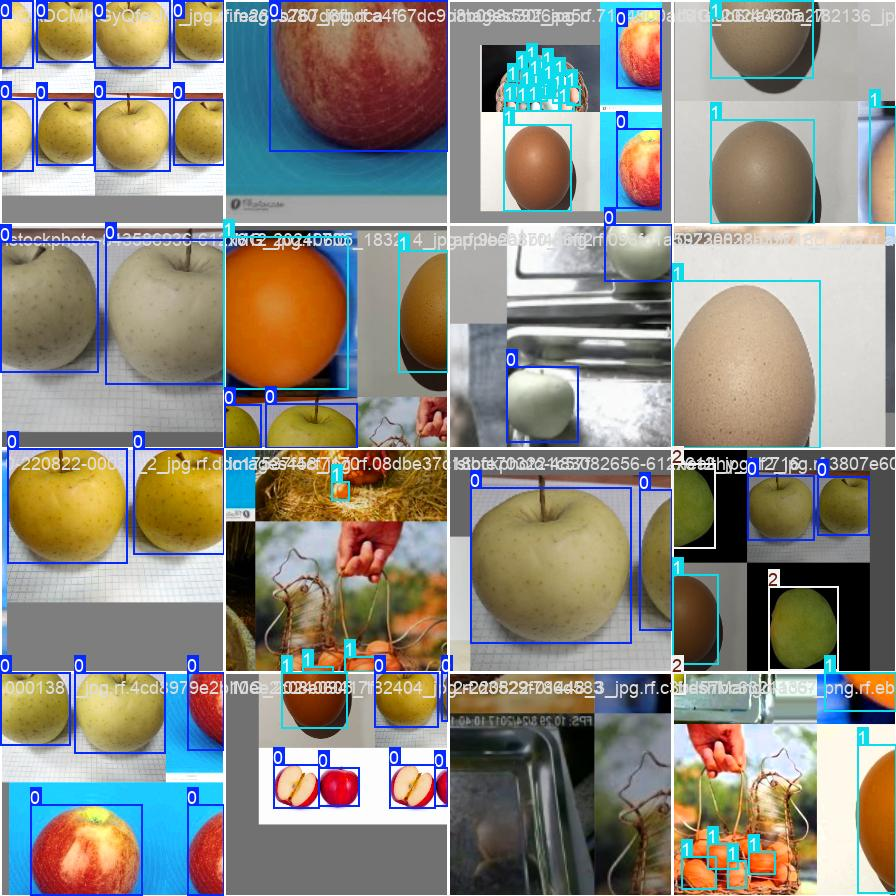

In [13]:
# Let's see some outputs of our trained models.

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch0.jpg', width=600)


/content/datasets/egg-fruit


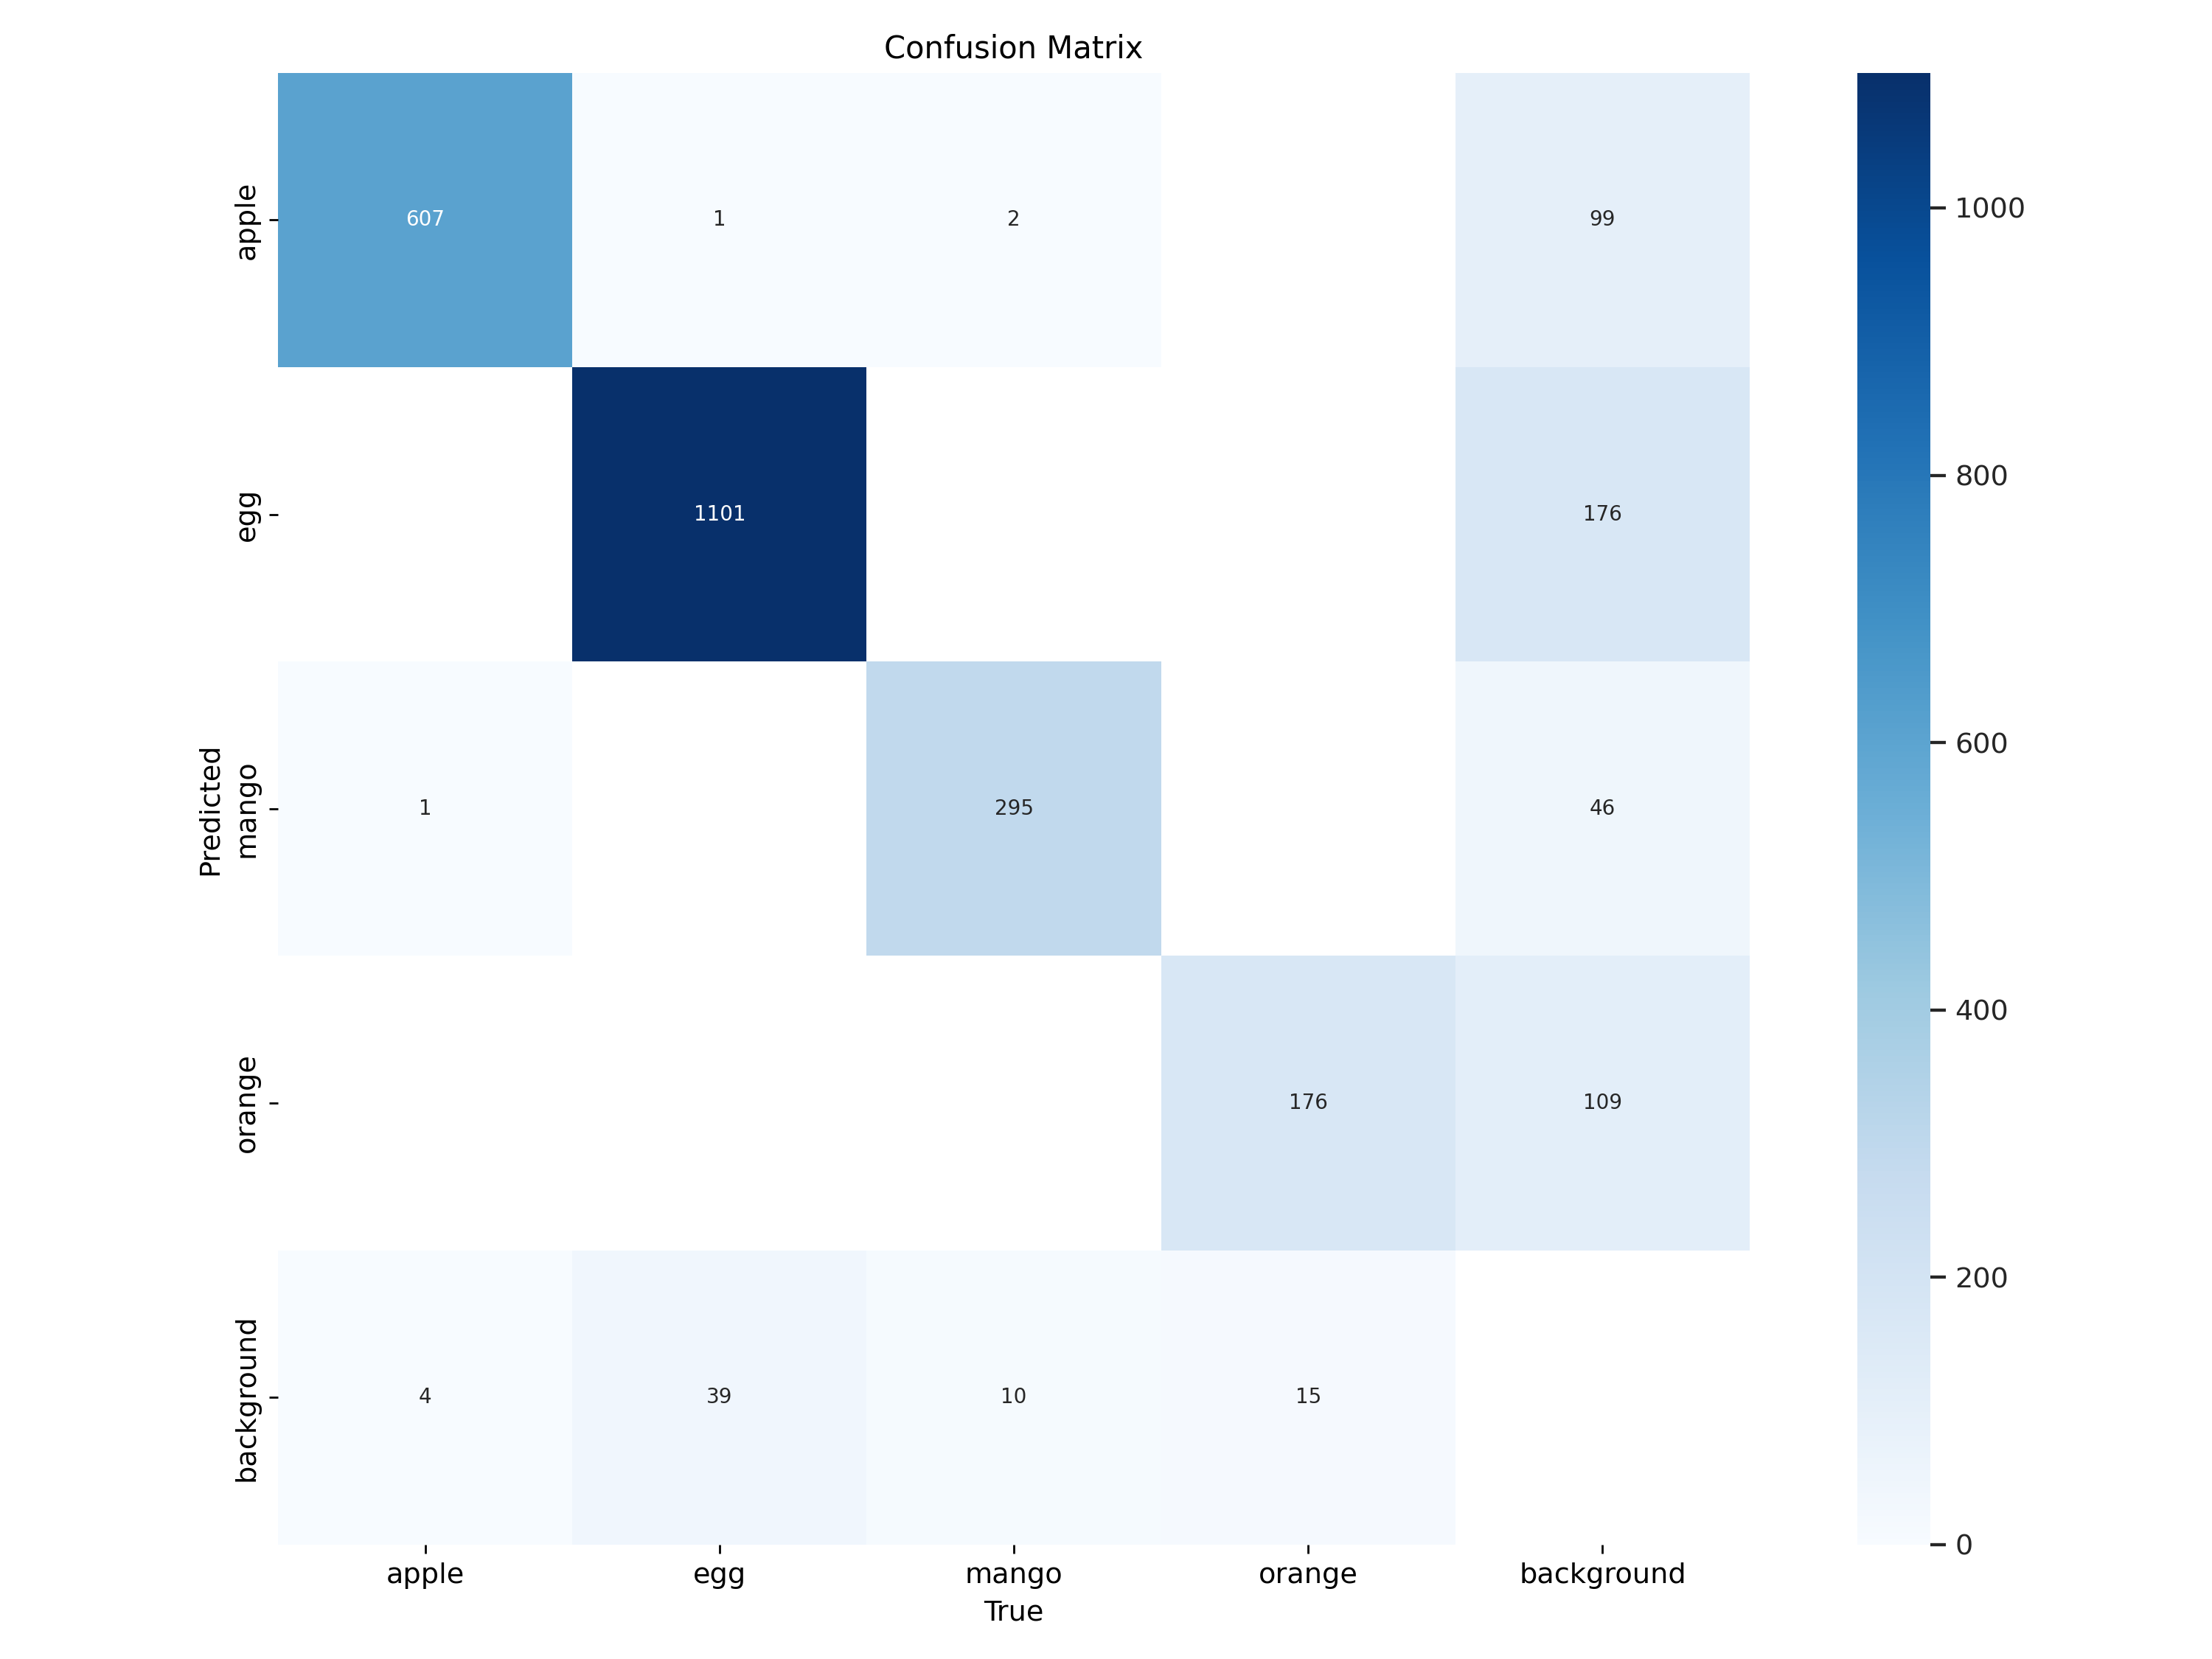

In [14]:
# See the confusion matrix.

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content/datasets/egg-fruit


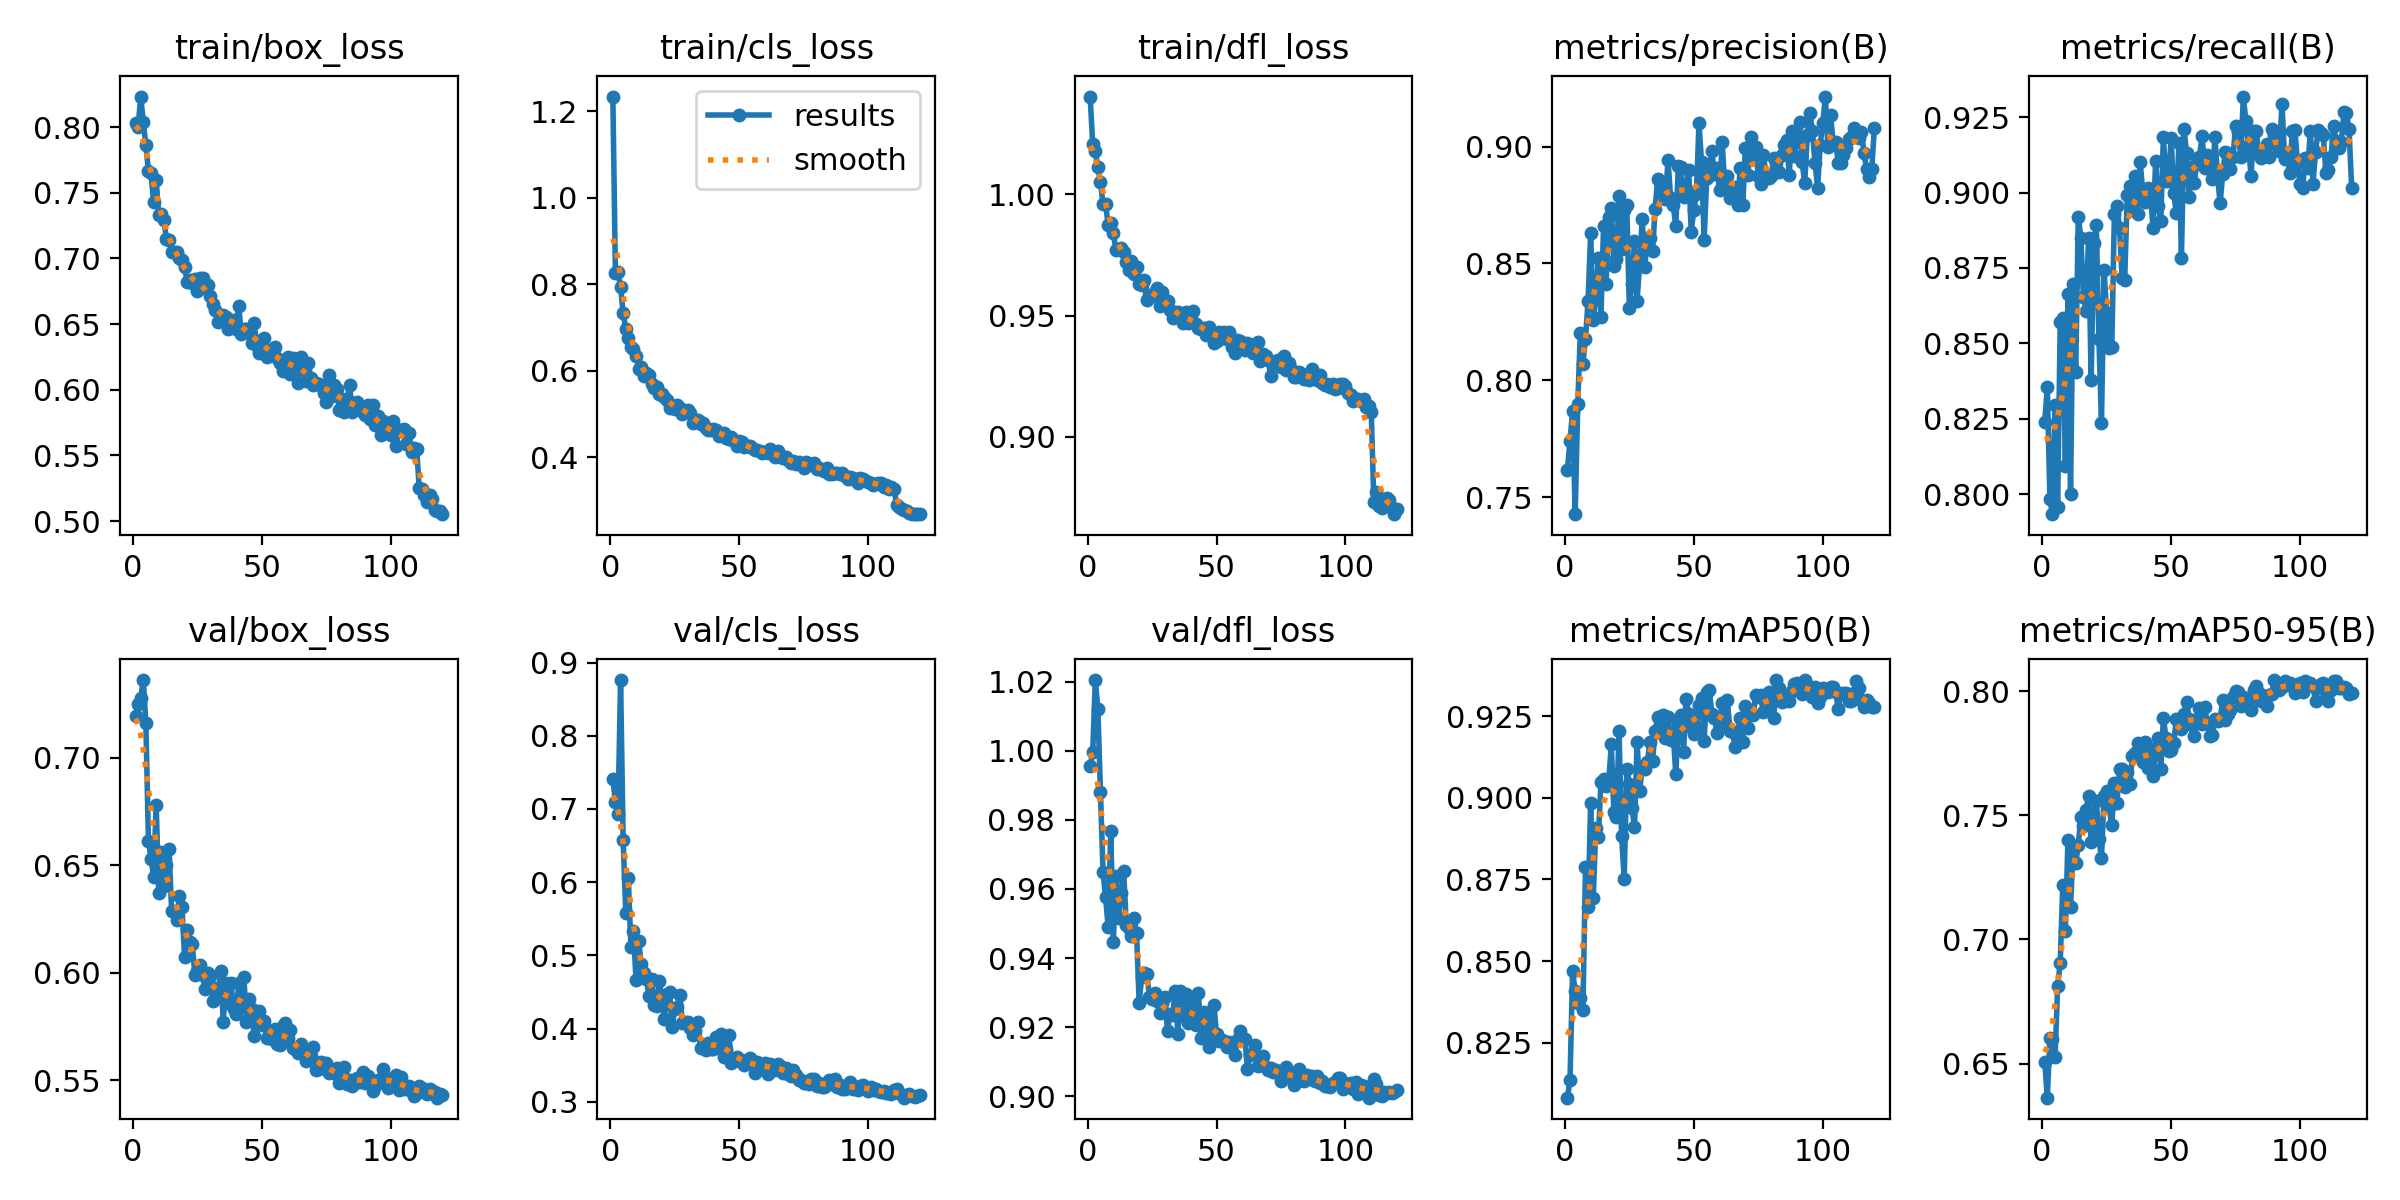

In [15]:
# See some metrics.

%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=900)

**Now we are ready to use our 'best.pt' model.**

Look for it at: ../runs/detect/train/weights/best.pt.

Next, you can skip the parts below and move to another example program to deploy and use our trained model.




+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**Now, after haveing our own 'best.pt' model...**

Let's try to make some inferences (predicting) with our custom best model

In [16]:
# Notice below the use of our new trained 'best.pt' model.
# Let's hope that it works!

%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={HOME}/test/images save=True


/content/datasets/egg-fruit
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/321 /content/datasets/egg-fruit/test/images/-00001_jpeg_jpg.rf.78ec191ddda3f7bd1ab5a5e480ed7573.jpg: 224x224 2 apples, 10.8ms
image 2/321 /content/datasets/egg-fruit/test/images/-00001_jpeg_jpg.rf.8901eb7cdf1351a4fee56093ac4a8819.jpg: 224x224 2 apples, 7.5ms
image 3/321 /content/datasets/egg-fruit/test/images/-00002_jpeg_jpg.rf.8c1f442a71e5ea5c53784330f42e1a7f.jpg: 224x224 1 apple, 7.2ms
image 4/321 /content/datasets/egg-fruit/test/images/-00003_jpeg_jpg.rf.ebaffc9352007f4dc923481023cbb87d.jpg: 224x224 2 apples, 7.3ms
image 5/321 /content/datasets/egg-fruit/test/images/-00006_jpeg_jpg.rf.87aead4eefce5e62f7a4a744e3428423.jpg: 224x224 1 apple, 7.5ms
image 6/321 /content/datasets/egg-fruit/test/images/-00010_jpeg_jpg.rf.3a159999c0c8afb4e8815b72f20b0d33.jpg: 224x224 2 apples, 7.4ms
image 7/3

**Extra:**

Validate our trained best model with just the validation set.

This is useful when:

- You want to evaluate the performance of a previously trained model on the validation set.
- You want to compare the performance of different models or checkpoints.
- You do not need to train the model further.


In [17]:
%cd {HOME}

# This command is used to evaluate (validate) a pre-trained model on a dataset. It does not involve training; instead,
# it calculates performance metrics (e.g., mAP, precision, recall) for the given model using the validation set

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={HOME}/data.yaml


/content/datasets/egg-fruit
Ultralytics 8.3.100 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/egg-fruit/valid/labels.cache... 912 images, 0 backgrounds, 0 corrupt: 100% 912/912 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 135, len(boxes) = 2251. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 57/57 [00:06<00:00,  8.56it/s]
                   all        912       2251      0.904      0.916      0.935      0.804
                 apple        320        612      0.929      0.974      0.972       0.91
                   egg        350       1141      0.947      0.899      0.972      0.758
         

/content/datasets/egg-fruit


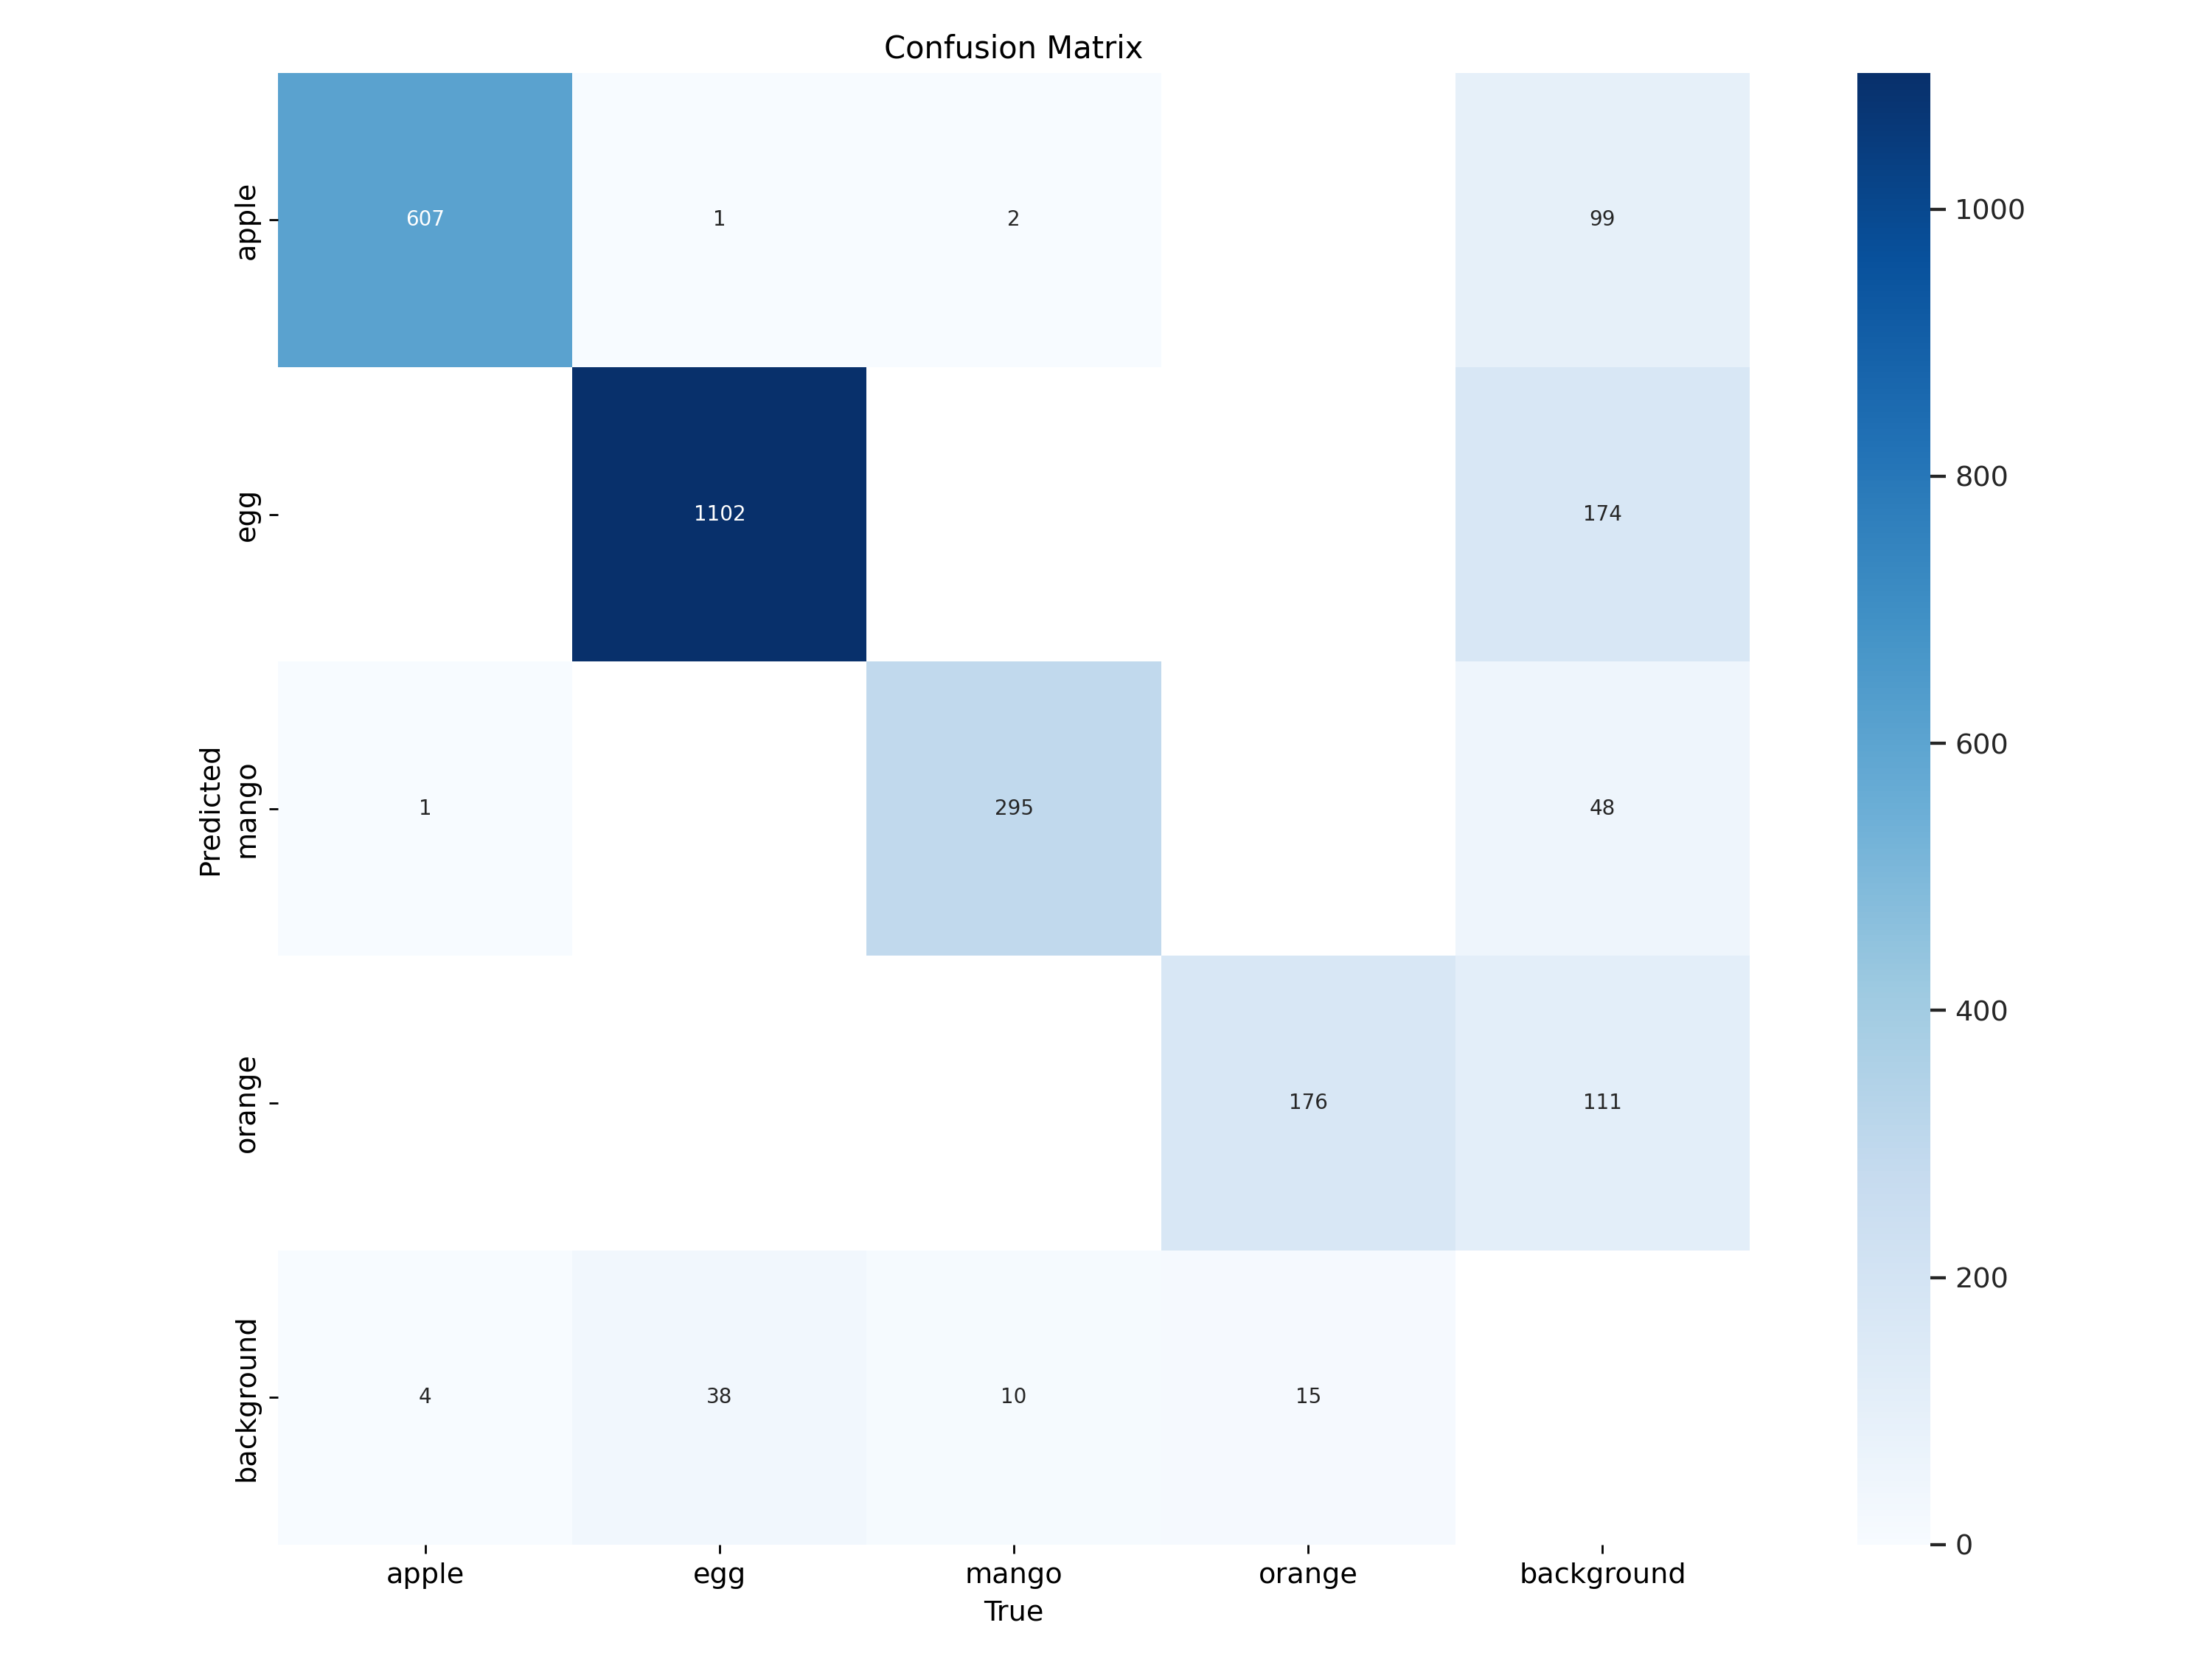

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=600)